In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

## Data Preparation

In [3]:
# load dataset

df = pd.read_csv('Global_Energy_Consumption_Renewable_Generation/renewablePowerGeneration97-17.csv')
df

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05
5,1995,2545.96,7.95,0.19,39.89
6,1996,2583.18,9.45,0.22,42.18
7,1997,2614.54,12.08,0.27,42.38
8,1998,2628.63,16.07,0.35,45.35
9,1999,2636.26,21.52,0.61,48.66


In [4]:
# check for null values in each column
null_columns = df.isnull().any()

# print column names with null values
print(null_columns[null_columns == True].index)

Index([], dtype='object')


In [5]:
# check for duplicates
duplicates = df.duplicated()

# print duplicate rows
print(df[duplicates])

Empty DataFrame
Columns: [Year, Hydro(TWh), Biofuel(TWh), Solar PV (TWh), Geothermal (TWh)]
Index: []


## Data Preprocessing

In [6]:
# calculate the sum of renewable energy for each year

list_renewables = ['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']
df['Total_Renewables (TWh)'] = df[list_renewables].sum(axis=1)
df = df.drop(columns = list_renewables)
df.head()

,Year,Total_Renewables (TWh)
0,1990,2232.06
1,1991,2310.31
2,1992,2311.21
3,1993,2443.66
4,1994,2468.26


In [7]:
# convert to datetime format 
# Prophet only accept datetime format

df['Year'] = pd.to_datetime(df['Year'], format = '%Y')
df.tail()

,Year,Total_Renewables (TWh)
23,2013-01-01,3756.02
24,2014-01-01,4961.85
25,2015-01-01,5158.90
26,2016-01-01,5531.73
27,2017-01-01,5853.49


In [8]:
# check column data types
# check that year is datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Year                    28 non-null     datetime64[ns]
 1   Total_Renewables (TWh)  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 576.0 bytes


In [9]:
# rename column as ds = time/date & y = value
# MUST rename as ds and y because it is Prophet's requirements

df = df.rename(columns = {'Year': 'ds', 'Total_Renewables (TWh)': 'y'})
df.head()

,ds,y
0,1990-01-01,2232.06
1,1991-01-01,2310.31
2,1992-01-01,2311.21
3,1993-01-01,2443.66
4,1994-01-01,2468.26


## Data Visualisation

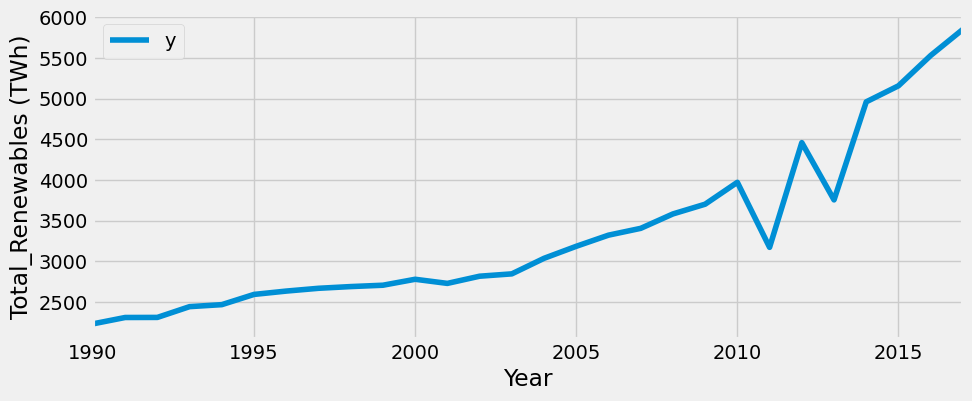

In [10]:
# set year as index to plot
df.set_index("ds", inplace=True)

# plot
df.plot(figsize=(10, 4))
plt.xlabel("Year")
plt.ylabel("Total_Renewables (TWh)")
plt.show()


## Data Modelling

In [11]:
# !pip install prophet

# !pip install plotly

In [12]:
from prophet import Prophet

In [13]:
# reset the index to normal column
df = df.reset_index()
df.head()

,ds,y
0,1990-01-01,2232.06
1,1991-01-01,2310.31
2,1992-01-01,2311.21
3,1993-01-01,2443.66
4,1994-01-01,2468.26


In [14]:
# Create a Prophet model
model = Prophet(interval_width = 0.85)

# Fit the model to the data
model.fit(df)

14:02:12 - cmdstanpy - INFO - Chain [1] start processing
14:02:12 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
# Create a dataframe for future predictions

years_to_forecast = 20
future_df = model.make_future_dataframe(periods = years_to_forecast, freq = pd.DateOffset(years=1))
future_df

,ds
0,1990-01-01
1,1991-01-01
2,1992-01-01
3,1993-01-01
4,1994-01-01
5,1995-01-01
6,1996-01-01
7,1997-01-01
8,1998-01-01
9,1999-01-01


In [49]:
# Make predictions
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2033-01-01,6610.213524,5978.946889,7234.860205
44,2034-01-01,6719.763208,6076.537028,7325.397715
45,2035-01-01,6850.009430,6252.517520,7481.419709
46,2036-01-01,7000.937124,6341.489496,7583.076166
47,2037-01-01,7057.962689,6390.327987,7648.553474


## Plot forecast

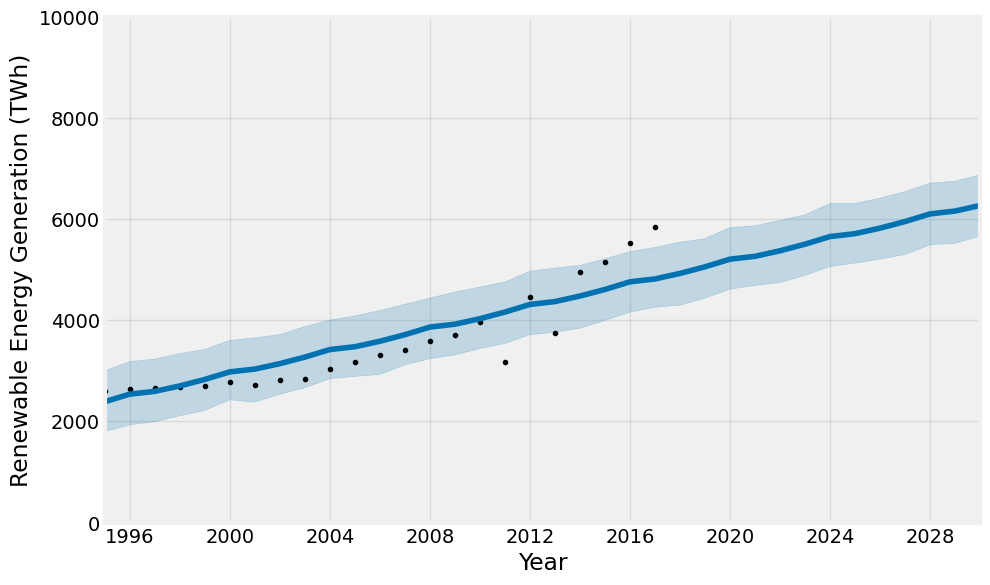

In [50]:
# Plot the forecasted data + actual 
model.plot(forecast, xlabel="Year", ylabel="Renewable Energy Generation (TWh)")
plt.xlim(pd.to_datetime('1995'), pd.to_datetime('2030'))
plt.ylim(0, 10000)
plt.show()

In [21]:
# # Plot the forecasted data
# model.plot(forecast, xlabel="Year", ylabel="Renewable Energy Generation (MW)")
# plt.xlim(pd.to_datetime('2017'), pd.to_datetime('2050'))

# plt.show()

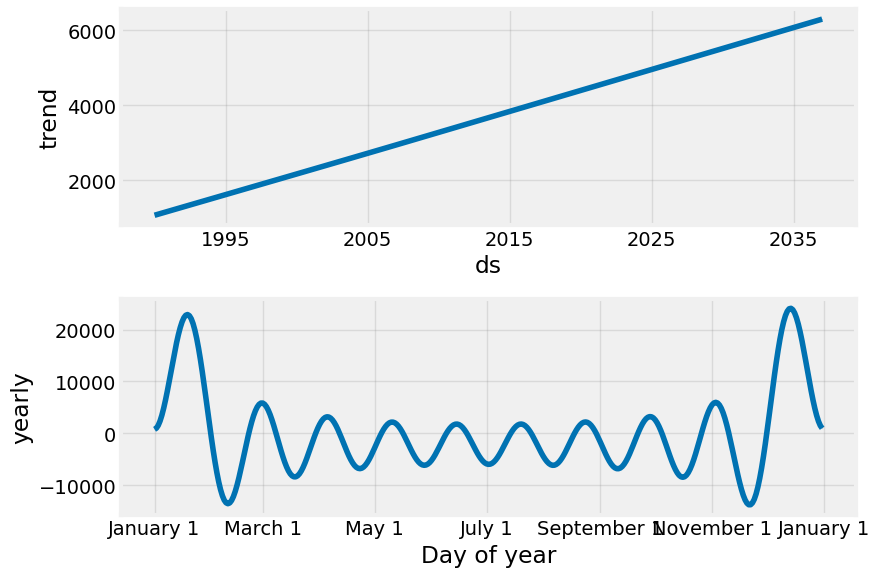

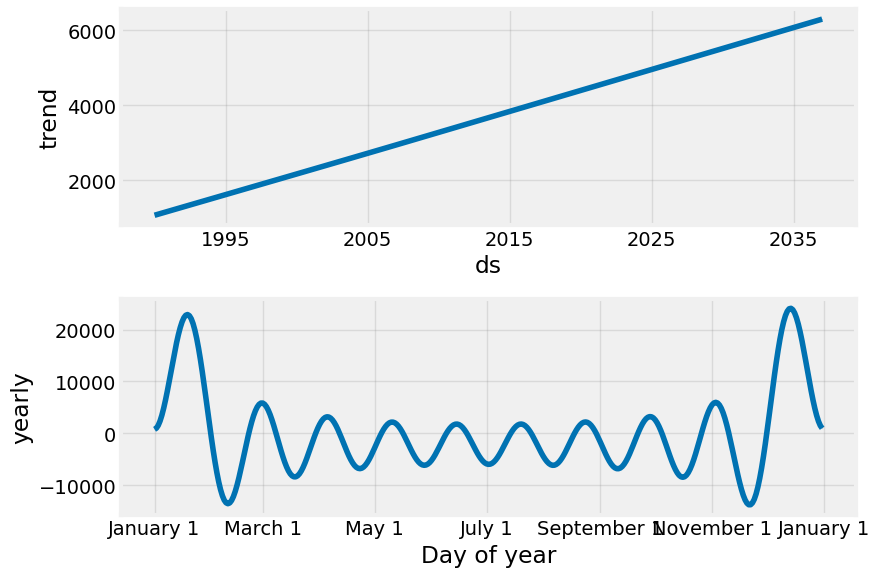

In [51]:
model.plot_components(forecast)

In [23]:
# fig1 = model.plot_components(forecast)

## Changepoint
### General definition, purpose & interpretation of changepoint in Prophet
Prophet's changepoint detection is a useful feature that allows the model to automatically detect changes in the underlying trend, seasonality, or other patterns in a time series. This helps to improve the accuracy of forecasts and predictions.
If the rate of change in the time series is relatively constant, it means that the time series is exhibiting a stable and predictable pattern of growth or decline over time. In some cases, a constant rate of change may be desirable if it reflects steady and sustainable growth or decline in a particular metric.

Text(20.33333333333333, 0.5, 'Total Renewables Generated (TWh)')

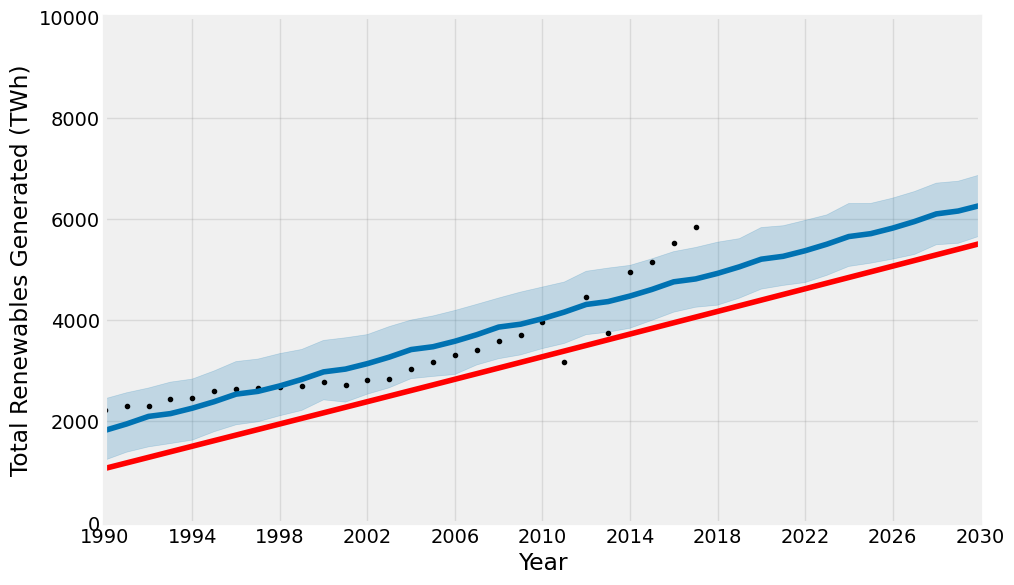

In [52]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.xlim(pd.to_datetime('1990'), pd.to_datetime('2030'))
plt.ylim(0, 10000)
plt.xlabel("Year")
plt.ylabel("Total Renewables Generated (TWh)")
# plt.title("Graph of actual, forecasted and changepoint of total generation of renewables")

### Our Changepoint
The changepoint in our Prophet model appears as a linear graph. This means the rate of change in time series is constant. Increasing linear graph indiates a constant growth. In short, the total renewable energy generation is increasing constantly over the years.

## Renewable energy generation relative to total energy production
What is the renewable energy generation contribution to the total energy production by 2030? 
### Data Preparation

#### Obtain the forecasted dataset for total energy production
Forecasted total energy production obtain from R

In [66]:
# get data of total energy
df_total = pd.read_csv('Exported Data/historical_predicted2100_combined.csv')
df_total

,Year,Total_Energy
0,1985,9825.320895
1,1986,10120.317760
2,1987,10611.528800
3,1988,11074.628380
4,1989,11588.067170
...,...,...
111,2096,61375.974634
112,2097,61849.392413
113,2098,62322.810192
114,2099,62796.227971


In [67]:
# Compute the percentage of forecasted renewable energy generation
# (forcasted renewable energy / total energy ) X 100%
forecast['yhat_pct'] = forecast['yhat'] / df_total['Total_Energy'] * 100

In [68]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yhat_pct
0,1990-01-01,1070.579907,1233.780811,2447.815439,1070.579907,1070.579907,752.251902,752.251902,752.251902,752.251902,752.251902,752.251902,0.0,0.0,0.0,1822.831809,18.552390
1,1991-01-01,1180.574923,1391.937445,2568.106131,1180.574923,1180.574923,770.637449,770.637449,770.637449,770.637449,770.637449,770.637449,0.0,0.0,0.0,1951.212372,19.280149
2,1992-01-01,1290.569939,1497.031079,2661.588290,1290.569939,1290.569939,809.704468,809.704468,809.704468,809.704468,809.704468,809.704468,0.0,0.0,0.0,2100.274407,19.792383
3,1993-01-01,1400.866311,1562.823180,2777.922021,1400.866311,1400.866311,754.562892,754.562892,754.562892,754.562892,754.562892,754.562892,0.0,0.0,0.0,2155.429203,19.462768
4,1994-01-01,1510.861327,1630.946259,2838.619655,1510.861327,1510.861327,752.251902,752.251902,752.251902,752.251902,752.251902,752.251902,0.0,0.0,0.0,2263.113228,19.529687
5,1995-01-01,1620.856343,1796.922352,3000.202257,1620.856343,1620.856343,770.637449,770.637449,770.637449,770.637449,770.637449,770.637449,0.0,0.0,0.0,2391.493792,20.112794
6,1996-01-01,1730.851359,1933.732072,3184.842124,1730.851359,1730.851359,809.704468,809.704468,809.704468,809.704468,809.704468,809.704468,0.0,0.0,0.0,2540.555827,20.909280
7,1997-01-01,1841.147731,1993.485438,3234.300038,1841.147731,1841.147731,754.562892,754.562892,754.562892,754.562892,754.562892,754.562892,0.0,0.0,0.0,2595.710623,21.174933
8,1998-01-01,1951.148389,2112.517823,3342.946625,1951.148389,1951.148389,752.251902,752.251902,752.251902,752.251902,752.251902,752.251902,0.0,0.0,0.0,2703.400290,21.597947
9,1999-01-01,2061.155887,2217.314777,3424.562497,2061.155887,2061.155887,770.637449,770.637449,770.637449,770.637449,770.637449,770.637449,0.0,0.0,0.0,2831.793336,22.050338


In [43]:
# Export the DataFrame to a CSV file
# df.to_csv('renew_historical_values.csv', index=False)
# forecast.to_csv('historical_forecasted_pct.csv', index=False)

### Results
What is the % of the total energy production is renewable energy by 2030?

In [77]:
for i in forecast.index:
    year = str(forecast['ds'][i])
    if year[0:4] == '2010':
#         print(forecast['ds'][i])
        print("By 2010,", round(forecast['yhat_pct'][i], 2), "% of the total energy production is renewable energy.")
        break

2010-01-01 00:00:00
By 2010, 23.04 % of the total energy production is renewable energy.


In [75]:
for i in forecast.index:
    year = str(forecast['ds'][i])
    if year[0:4] == '2020':
#         print(forecast['ds'][i])
        print("By 2020,", round(forecast['yhat_pct'][i], 2), "% of the total energy production is renewable energy.")
        break

By 2020, 22.35 % of the total energy production is renewable energy.


In [78]:
for i in forecast.index:
    year = str(forecast['ds'][i])
    if year[0:4] == '2030':
#         idx_30 = i
        print("By 2030,", round(forecast['yhat_pct'][i], 2), "% of the total energy production is renewable energy.")
        break

By 2030, 22.59 % of the total energy production is renewable energy.


In [71]:
# n = 30%

# for i in forecast.index:
#     year = str(forecast['ds'][i])
#     if year[0:4] == '2017':
#         idx_17 = i
#     if forecast['yhat_pct'][i] >= 30:
#         dur = (forecast['ds'][i] - forecast['ds'][idx_17]) / 365
#         list_dur = str(dur).split(sep = ' ')
#         print('With the current rate of generation of renewable energy, it will take' , list_dur[0], 'years to cover 30% of the global electricity demand.')
#         break
# print('Unable to achieve')
    

## Model Evaluation

### Cross validation
model:  
This is the Prophet model that you want to perform cross-validation on.

initial:  
This parameter specifies the initial training period for the model.   
It is a string that represents the duration of the initial training period in days, weeks, months, or years.   
For example, '1095 days' represents a 3-year training period.

period:  
This parameter specifies the length of the training and evaluation periods for each fold of the cross-validation.   
It is a string that represents the duration of each period in days, weeks, months, or years.  
For example, '547 days' represents a 1.5-year period.

horizon:   
This parameter specifies the forecast horizon for each fold of the cross-validation.  
It is a string that represents the duration of the forecast horizon in days, weeks, months, or years.  
For example, '730 days' represents a 2-year forecast horizon.

In short, cross_validation() is used: 
- To evaluate the performance of a Prophet time series model over a range of historical time periods, using a sliding window approach. 
- The function takes as input a Prophet model, the length of the initial training period, the length of the training and evaluation periods for each fold, and the forecast horizon.

In [59]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation
df_cv = cross_validation(model, initial='1095 days', period='547 days', horizon = '730 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res.head()

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]14:20:16 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing
  7%|█████▌                                                                             | 1/15 [00:14<03:26, 14.73s/it]14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
 13%|███████████                                                                        | 2/15 [00:15<01:22,  6.32s/it]14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
 20%|████████████████▌                                                                  | 3/15 [00:15<00:43,  3.65s/it]14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing
 27%|██████████████████████▏                                            

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,174 days,712.138784,26.685929,26.328346,0.009729,0.009362,0.009750,1.000000
1,176 days,16167.594498,127.151856,88.202101,0.028451,0.009362,0.029252,0.666667
2,177 days,16137.944518,127.035210,87.595361,0.027518,0.007650,0.028341,0.666667
3,179 days,267933.565411,517.622995,370.208888,0.116306,0.068340,0.106113,0.333333
4,181 days,624920.069421,790.518861,650.148045,0.164569,0.213131,0.162044,0.333333


In [35]:
# !pip install scikit-learn

In [60]:
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = np.array(df_cv.y)
y_pred = np.array(df_cv.yhat)

mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)

print("RMSE:",rmse, "TWh")

RMSE: 533.624346965215 TWh


In [72]:
# Calculate R-squared
ss_total = np.sum((df_cv['y'] - df_cv['y'].mean()) ** 2)
ss_residual = np.sum((df_cv['y'] - df_cv['yhat']) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f"R-squared value: {r2}")

R-squared value: 0.6715619635003136
